<a href="https://colab.research.google.com/github/MeherNaaz19/AIML-2025/blob/main/Lab08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fetch_openml(data_id=10)

{'data':     lymphatics block_of_affere bl_of_lymph_c bl_of_lymph_s by_pass  \
 0       arched             yes            no            no      no   
 1    displaced             yes            no            no     yes   
 2     deformed              no            no            no     yes   
 3       arched              no            no            no      no   
 4       arched              no            no            no      no   
 ..         ...             ...           ...           ...     ...   
 143  displaced              no            no            no      no   
 144   deformed              no            no            no      no   
 145   deformed             yes            no            no     yes   
 146   deformed             yes            no            no      no   
 147     arched              no            no            no      no   
 
     extravasates regeneration_of early_uptake_in  lym_nodes_dimin  \
 0             no              no             yes                1  

In [3]:
fetch_openml(name='car')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:320: UserWarning: Multiple active versions of the dataset matching the name car exist. Versions may be fundamentally different, returning version 2. Available versions:
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=991
- version 3, status: active
  url: https://www.openml.org/search?type=data&id=40975

  warn(warning_msg)


{'data':      buying  maint  doors persons lug_boot safety
 0     vhigh  vhigh      2       2    small    low
 1     vhigh  vhigh      2       2    small    med
 2     vhigh  vhigh      2       2    small   high
 3     vhigh  vhigh      2       2      med    low
 4     vhigh  vhigh      2       2      med    med
 ...     ...    ...    ...     ...      ...    ...
 1723    low    low  5more    more      med    med
 1724    low    low  5more    more      med   high
 1725    low    low  5more    more      big    low
 1726    low    low  5more    more      big    med
 1727    low    low  5more    more      big   high
 
 [1728 rows x 6 columns],
 'target': 0       P
 1       P
 2       P
 3       P
 4       P
        ..
 1723    N
 1724    N
 1725    P
 1726    N
 1727    N
 Name: binaryClass, Length: 1728, dtype: category
 Categories (2, object): ['N', 'P'],
 'frame':      buying  maint  doors persons lug_boot safety binaryClass
 0     vhigh  vhigh      2       2    small    low           P

#Loading the data

In [4]:
car_data=fetch_openml(name='car',version=2,parser='auto')

In [6]:
from sklearn.datasets import fetch_openml
car_data=fetch_openml(name='car',version=2,parser='auto')

In [7]:
type(car_data)

sklearn.utils._bunch.Bunch

In [8]:
car_data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [11]:
car_data.feature_names, car_data.target.value_counts()

(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],
 binaryClass
 P    1210
 N     518
 Name: count, dtype: int64)

# Data description

In [12]:
print(car_data.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Binarized version of the original data set (see version 1). The multi-class target feature is converted to a two-class nominal target feature by re-labeling the majority class as positive ('P') and all others as negative ('N'). Originally converted by Quan Sun.

Downloaded from openml.org.


#Displaying feature names

In [13]:
car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

#Getting the whole dataframe

In [14]:
car_data=car_data.frame
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [15]:
type(car_data)

pandas.core.frame.DataFrame

#3-Exploratory Analysis

Before doing exploratory analysis let's get the training and test data

<Axes: xlabel='binaryClass', ylabel='count'>

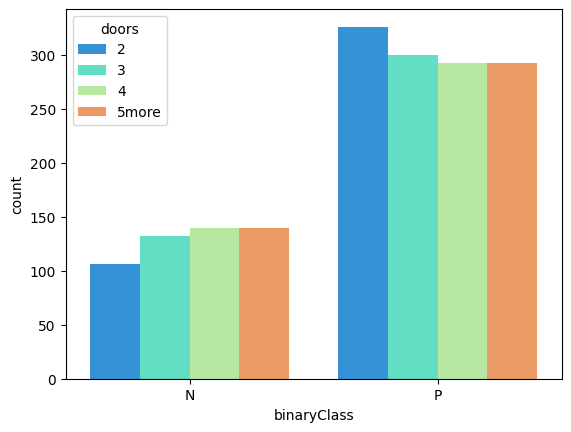

In [17]:
sns.countplot(x=car_data.binaryClass,hue='doors',data = car_data,palette='rainbow')

# Splitting data into training and test sets

In [26]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(car_data,test_size=0.2,random_state=20)
#print('Dataset size:{}\ntraining data is: {}\ntesting data is: {}'.format(len(car_data),len(train_data),len(test_data)))
car_data.shape,train_data.shape,test_data.shape

((1728, 7), (1382, 7), (346, 7))

#checking missing values

In [29]:
train_data.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
binaryClass,0


#Checking categorical features

Let's inspect some categorical features that are in the dataset,almost all.Let's see that!

In [30]:
train_data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'binaryClass'],
      dtype='object')

In [37]:
train_data['buying'].value_counts

<bound method IndexOpsMixin.value_counts of 438      high
36      vhigh
1170      med
1488      low
1474      low
        ...  
924       med
1247      med
271     vhigh
474      high
1379      low
Name: buying, Length: 1382, dtype: category
Categories (4, object): ['high', 'low', 'med', 'vhigh']>

In [38]:
train_data['maint'].value_counts

<bound method IndexOpsMixin.value_counts of 438     vhigh
36      vhigh
1170      med
1488     high
1474     high
        ...  
924     vhigh
1247      low
271       med
474     vhigh
1379    vhigh
Name: maint, Length: 1382, dtype: category
Categories (4, object): ['high', 'low', 'med', 'vhigh']>

In [39]:
train_data['doors'].value_counts

<bound method IndexOpsMixin.value_counts of 438         2
36          3
1170    5more
1488    5more
1474        4
        ...  
924         4
1247        4
271         4
474         3
1379    5more
Name: doors, Length: 1382, dtype: category
Categories (4, object): ['2', '3', '4', '5more']>

In [40]:
train_data['persons'].value_counts

<bound method IndexOpsMixin.value_counts of 438     2
36      4
1170    4
1488    2
1474    4
       ..
924     2
1247    2
271     2
474     4
1379    2
Name: persons, Length: 1382, dtype: category
Categories (3, object): ['2', '4', 'more']>

In [41]:
train_data['lug_boot'].value_counts

<bound method IndexOpsMixin.value_counts of 438       big
36      small
1170    small
1488      med
1474      big
        ...  
924       big
1247      med
271     small
474       big
1379    small
Name: lug_boot, Length: 1382, dtype: category
Categories (3, object): ['big', 'med', 'small']>

In [42]:
train_data['safety'].value_counts

<bound method IndexOpsMixin.value_counts of 438      low
36       low
1170     low
1488     low
1474     med
        ... 
924      low
1247    high
271      med
474      low
1379    high
Name: safety, Length: 1382, dtype: category
Categories (3, object): ['high', 'low', 'med']>

In [43]:
train_data['binaryClass'].value_counts

<bound method IndexOpsMixin.value_counts of 438     P
36      P
1170    P
1488    P
1474    N
       ..
924     P
1247    P
271     P
474     P
1379    P
Name: binaryClass, Length: 1382, dtype: category
Categories (2, object): ['N', 'P']>

#5-Training decision tree classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier()
tree_clf.fit(car_train_prepared, car_labels_prepared)

NameError: name 'car_train_prepared' is not defined

Let's train the same model on the scaled data.

In [48]:
from sklearn.tree import export_text
text_representation=export_text(tree_clf,feature_names=list(car_train.columns))
print(text_representation)
text_representation.plot_tree(car_train,car_labels)

NameError: name 'car_train' is not defined